In [1]:
# Installing the Required Modules

! pip install requests
! pip install pandas
! pip install BeautifulSoup4

In [2]:
# Importing Modules

import pandas
import requests
from bs4 import BeautifulSoup

In [3]:
# Requesting The Connection with Link

s_res=requests.get('https://www.vijaysales.com/tv-and-entertainment/televisions/brand/buy-samsung-televisions')
print(s_res)

<Response [404]>


In [4]:
# Web Scraping the Product Names of Samsung TV

s_soup=BeautifulSoup(s_res.content,'html.parser')
s_names=s_soup.find_all('h2',class_='BcktPrdNm_')
S_Names=[]
for i in s_names:
  f=i.get_text()
  S_Names.append(f)
S_Names

[]

In [5]:
# Web Scraping the Product Price of Samsung TV

s_price=s_soup.find_all('span',class_='Prdvsprc_')
S_Price=[]
for i in s_price:
  f=i.get_text()
  S_Price.append(f)
S_Price
import re
Sam_Price=[]
for i in S_Price:
  ss=re.sub('[^A-Za-z0-9]+', '', i)
  Sam_Price.append(ss)
Sam_Price

[]

In [6]:
# Web Scraping the Product EMI Details of Samsung TV

s_emi=s_soup.find_all('div',class_='BcktPrdemi h54')
S_EMI=[]
for i in s_emi:
  f=i.get_text()
  S_EMI.append(f)
S_EMI

[]

In [7]:
# Web Scraping the Product Exchange Offers of Samsung TV

s_exchange=s_soup.find_all('div',class_='ofrPrd')
S_Exchange=[]
for i in s_exchange:
  f=i.get_text()
  S_Exchange.append(f)
S_Exchange

[]

In [8]:
# Web Scraping the Product URL Limks of Samsung TV


s_url=s_soup.find_all('a',id='pdpId_')
S_URL=[]
for i in s_url:
  f=i['href']
  S_URL.append(f)
S_URL

[]

In [9]:
# Requesting The Connection with Link

lg_res=requests.get('https://www.vijaysales.com/tv-and-entertainment/televisions/brand/buy-lg-televisions')
print(lg_res)

<Response [404]>


In [10]:
# Web Scraping the Product Names of LG TV

lg_soup=BeautifulSoup(lg_res.content,'html.parser')
lg_names=lg_soup.find_all('h2',class_='BcktPrdNm_')
LG_Names=[]
for i in lg_names:
  f=i.get_text()
  LG_Names.append(f)
LG_Names

[]

In [11]:
# Web Scraping the Product Price of LG TV

lg_price=lg_soup.find_all('span',class_='Prdvsprc_')
LG_Price=[]
for i in lg_price:
  f=i.get_text()
  LG_Price.append(f)
LG_Price
Lg_Price=[]
for i in LG_Price:
  ss=re.sub('[^A-Za-z0-9]+', '', i)
  Lg_Price.append(ss)
Lg_Price

[]

In [12]:
# Web Scraping the Product EMI Details of LG TV

lg_emi=lg_soup.find_all('div',class_='BcktPrdemi h54')
LG_EMI=[]
for i in lg_emi:
  f=i.get_text()
  LG_EMI.append(f)
LG_EMI

[]

In [13]:
# Web Scraping the Product Exchange Offers of LG TV

lg_exchange=lg_soup.find_all('div',class_='ofrPrd')
LG_Exchange=[]
for i in lg_exchange:
  f=i.get_text()
  LG_Exchange.append(f)
LG_Exchange

[]

In [14]:
# Web Scraping the Product URL Links of LG TV

lg_url=lg_soup.find_all('a',id='pdpId_')
LG_URL=[]
for i in lg_url:
  f=i['href']
  LG_URL.append(f)
LG_URL

[]

In [15]:
# Creating Table from all the Web Scraped Data on Samsung TV

SAMSUNG=pandas.DataFrame({'Name':S_Names,'Price':Sam_Price,'EMI':S_EMI,'EXCHANGE':S_Exchange,'URL':S_URL})
SAMSUNG

,Name,Price,EMI,EXCHANGE,URL


In [16]:
# Creating Table from all the Web Scraped Data on LG TV

LG=pandas.DataFrame({'Name':LG_Names,'Price':Lg_Price,'EMI':LG_EMI,'EXCHANGE':LG_Exchange,'URL':LG_URL})
LG

,Name,Price,EMI,EXCHANGE,URL


In [17]:
SAMSUNG.to_csv('Samsung.csv')
LG.to_csv('LG.csv')

In [18]:
# Creating Table Bringing together the Prices of Samsung and LG TV

price=pandas.DataFrame({'Samsung':SAMSUNG['Price'],'Lg':LG['Price']})
price

,Samsung,Lg


In [19]:
# Convering the Prices from Object to Integers

price['Samsung']=price['Samsung'].astype('int')
price['Lg']=price['Lg'].astype('int')

Average Price Difference between Samsung and LG is  nan


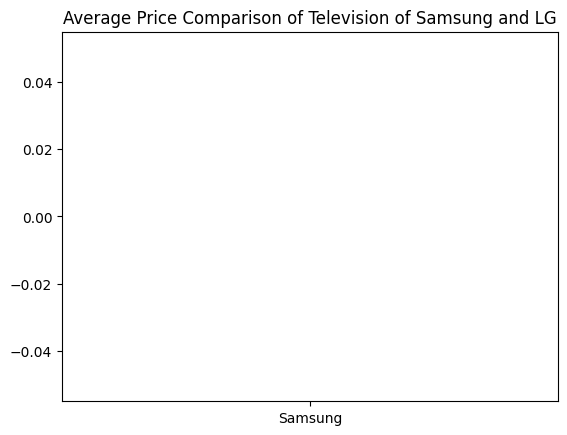

In [20]:
# Plotting Bar Chart To represent the difference in the average of Price of Both the TV Brands

import matplotlib.pyplot as plt
plt.bar('Samsung',price['Samsung'].mean())
plt.bar('LG',price['Lg'].mean())
plt.title('Average Price Comparison of Television of Samsung and LG')
plt.plot()

# Average Price Difference between Samsung and LG
avg_difference=price['Samsung'].mean()-price['Lg'].mean()
print('Average Price Difference between Samsung and LG is ',avg_difference)